# University Name
CBS International Business School
<img src="https://github.com/CypranA/Master-Thesis-Statistical-Analysis/blob/main/cbs_logo.png" alt="CBS Logo" width="200"/>


---

## Master Thesis Topic: 
Leveraging Big Data Analytics for Enhanced Financial Inclusion in Nigeria: A Comprehensive Analysis of Strategies, Impact, And Challenges in Developing Economies.

---

## Program: 
Master of Arts in International Business

---

## Specialization: 
Digital Transformation Management

---

## Supervisor: 
Prof. Dr. Geoffrey Writes

---

### Student Details:
- **Name**: Kosisochukwu Cypran Akubude
- **Student Number**: 1195501031
- **Date**: April 14, 2024


# TABLE OF CONTENTS
1. Summary
2. Phase 1: Ask
3. Phase 2: Prepare
* 3.1. Data Location
* 3.2. Data Organization
* 3.3. Data Credibility
* 3.4. Data License and Privacy
4. Phase 3: Process
5. Phase 4: Analyze
* 5.1. Regression
* 5.2. Pearson Correlation Test
* 5.3. Test for Multicollinearity
* 5.4. Descriptive Statistics
* 5.5. Hypothesis Testing
6. Phase 5: Share
7. Phase 6: Conclusion (Act)

# 1. Summary

The purpose of this study is to analyze the relationship between financial inclusion and big data, including economic data variables. We aim towards analysing the datasets and discuss findings. The following tests will be conducted in this analysis. 

- Regression
- Pearson Correlation Test
- Test for Multicollinearity
- Descriptive Statistics
- Hypothesis Testing


# 2. Phase 1: Ask

Questions guiding our analysis incude:
- What is the expected relationship between financial inclusion and big data?
- Do big data sources have a significant impact on increased access to financial services?
- Does an economy with a structured data, accessible data source, and data infrastructure help streamline digital financial inclusion?

# 3. Phase 2: Prepare
**3.1. Data Location:** All data used in this study were obtained from the World Bank DataBank. Data variables for Model 1 were obtained from the Global Findex Database whilst data variables for Model 2 were obtained from the Statistical Performance Indicator Database.

**3.2. Data Organization:** The extracted datasets from the Global Findex dataset comprised 1,450 rows whilst the SPI dataset extracted has 625 rows. Each dataset were organized by columns such as country names, series or variable description, and the corresponding years for each country. The downloaded data have already been cleaned and orginized in Excel before being imported for analysis with Python. The data used in this study therefore are organized by the coutnries and data variables in different columns.  

**3.3. Data Credibility:** The data used are based on the survey of adults from the age of 15 and above accross all countries. The data were last updated in 2021. Only values for the year 2021 are considered in this analysis due to missing data for the previous year. 

**3.4. Data License and Privacy:** The metadata from the datasets shows that its an open-source data which justifies the use for this study. The licence can be accessed via this link: https://datacatalog.worldbank.org/public-licenses#cc-by


# 4. Phase 3: Process

Excel has been used to clean and restructure the dataset in a way that is more convenient for analysis. All variables needed for the study have been selected and placed in column sections. The datasets used in this study are named as follow:

- **model1:** Contains financial inclusion and big data source variables.

- **model2:** Contains financial inclusion and SPI variables.

# 5. Phase 4: Analyze

In [9]:
#importing relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr

# Importing Model 1 and Model 2 Datasets

In [10]:
#importing model1 dataframe and indexing country column to analyse on numerical data types
model1 = pd.read_csv("model1.csv")
model2 = pd.read_csv('model2.csv')
display(model1.head())
display(model2.head())

,country,internet_access,mobile_utility_payment,digital_payment,mobile_phone_ownership,mobile_bill_payment,mobile_money_account
0,Algeria,82.91,1.27,33.74,95.18,3.57,0.00
1,Benin,28.85,5.31,43.69,72.39,7.17,36.68
2,Botswana,50.40,15.81,51.78,88.43,20.28,36.57
3,Burkina Faso,23.76,6.23,33.29,76.13,9.83,24.67
4,Cameroon,40.48,8.60,49.85,75.23,11.59,42.43


,country,source_data_capacity,spi_data_use,spi_data_services,spi_data_products,spi_data_sources,spi_data_infrastructure,account
0,Benin,60.0,80.0,69.90,83.63,29.18,50.0,48.61
1,Botswana,60.0,60.0,67.53,77.80,61.53,40.0,58.76
2,Burkina Faso,60.0,80.0,69.03,81.46,36.66,60.0,36.11
3,Cameroon,20.0,60.0,63.87,82.09,23.34,35.0,51.65
4,Chad,50.0,70.0,57.03,75.84,18.02,30.0,23.65


In [11]:
#checking and confirming data types
model1.info()
print("\n")
model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 40 non-null     object 
 1   internet_access         40 non-null     float64
 2   mobile_utility_payment  40 non-null     float64
 3   digital_payment         40 non-null     float64
 4   mobile_phone_ownership  40 non-null     float64
 5   mobile_bill_payment     40 non-null     float64
 6   mobile_money_account    40 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  35 non-null     object 
 1   source_data_capacity     35 non-null     float64
 2   spi_data_use             35 non-null     flo

We can confirm from the datasets review that all data variables are numeric whch is essential for statistical analysis. There is only one categorical variable in the dataset, 'country' which contains a list of all countries used in the study for each model. The country column is not used for statistical analysis as it is a non numerical variable. The variable could be used only when creating visual charts. 

In [12]:
# Checking number of countries or obervations in each dataset

country_count_model_1 = len(model1['country'].unique())
country_count_model_2 = len(model2['country'].unique())
print("Number of countries for Model 1:", country_count_model_1)
print("Number of countries for Model 2:", country_count_model_2)

Number of countries for Model 1: 40
Number of countries for Model 2: 35


The dataset contain 40 countries and 35 countries for model 1 and 2 respectively. The countries are also referred to as the observations. Therefore, we have 40 observations for model 1 and 35 observations for model 2. 

## 5.1. Regression

### Regression Analysis for Model 1

In [13]:
# Indicating and separating the dependent and independent variables from the model 1 dataframe

#Dependent variable definition
dep_var_model1 = model1['mobile_money_account']

#Independent variable definition
indep_var_model1 = model1[['internet_access', 'mobile_utility_payment', 
                           'digital_payment', 'mobile_phone_ownership', 
                           'mobile_bill_payment']]

In [16]:
# Adding a constant term to the independent variables for the intercept
indep_var_model1 = sm.add_constant(indep_var_model1)

# Fitting the OLS regression model
ols_model1 = sm.OLS(dep_var_model1, indep_var_model1).fit()

# Printing model summary
print(ols_model1.summary())

                             OLS Regression Results                             
Dep. Variable:     mobile_money_account   R-squared:                       0.858
Model:                              OLS   Adj. R-squared:                  0.837
Method:                   Least Squares   F-statistic:                     41.18
Date:                  Tue, 23 Apr 2024   Prob (F-statistic):           1.77e-13
Time:                          16:59:14   Log-Likelihood:                -135.17
No. Observations:                    40   AIC:                             282.3
Df Residuals:                        34   BIC:                             292.5
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

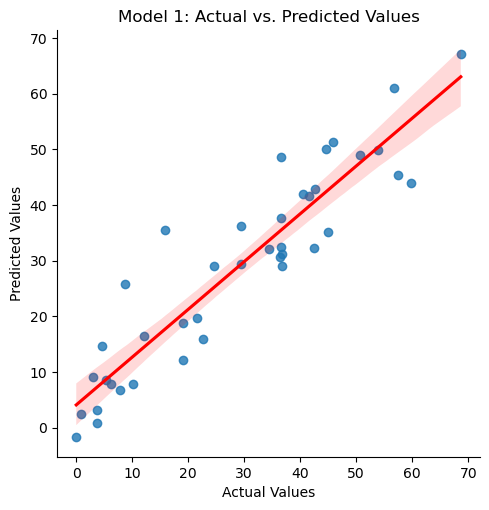

In [18]:
# Creating a Visual Representation of the Regression Analsis for Model 1

# Getting the predicted values from the OLS model
predicted_values = ols_model1.predict()

# Creating a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': dep_var_model1, 'Predicted': predicted_values})

# Creating a scatter plot with a regression line using Seaborn
sns.lmplot(x='Actual', y='Predicted', data=results_df, line_kws={'color': 'red'})

# Setting plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model 1: Actual vs. Predicted Values')

# Show plot
plt.show()

### Regression Analysis for Model 2

In [19]:
# Indicating and separating the dependent and independent variables from the model 2 dataframe

# Dependent variable definition for model 2
dep_var_model2 = model2['account']

# Independent variable definition for model 2
indep_var_model2 = model2[['source_data_capacity', 'spi_data_use', 
                           'spi_data_services', 'spi_data_products', 
                           'spi_data_sources', 'spi_data_infrastructure']]

In [20]:
# Adding a constant term to the independent variables for the intercept
indep_var_model2 = sm.add_constant(indep_var_model2)

# Fitting the OLS regression model for model 2
ols_model2 = sm.OLS(dep_var_model2, indep_var_model2).fit()

# Printing model summary for model 2
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                account   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     7.353
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           8.64e-05
Time:                        16:59:41   Log-Likelihood:                -136.66
No. Observations:                  35   AIC:                             287.3
Df Residuals:                      28   BIC:                             298.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

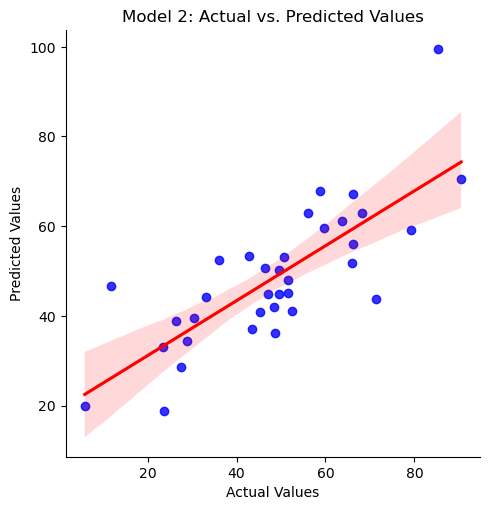

In [22]:
# Creating a Visual Representation of the Regression Analsis for Model 2

# Getting the predicted values from the OLS model for model 2
predicted_values_model2 = ols_model2.predict()

# Creating a DataFrame with actual and predicted values for model 2
results_model2 = pd.DataFrame({'Actual': dep_var_model2, 'Predicted': predicted_values_model2})

# Creating a regression plot using Seaborn for model 2
sns.lmplot(x='Actual', y='Predicted', data=results_model2, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Setting plot labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model 2: Actual vs. Predicted Values')

# Show plot
plt.show()

## 5.2. Pearson Correlation Test

### Correlation Test for Model 1

                        internet_access  mobile_utility_payment  \
internet_access                1.000000                0.275408   
mobile_utility_payment         0.275408                1.000000   
digital_payment                0.507508                0.736970   
mobile_phone_ownership         0.856528                0.346597   
mobile_bill_payment            0.389306                0.940515   
mobile_money_account           0.092876                0.799250   

                        digital_payment  mobile_phone_ownership  \
internet_access                0.507508                0.856528   
mobile_utility_payment         0.736970                0.346597   
digital_payment                1.000000                0.573997   
mobile_phone_ownership         0.573997                1.000000   
mobile_bill_payment            0.809292                0.440903   
mobile_money_account           0.806038                0.279005   

                        mobile_bill_payment  mobile_money_ac

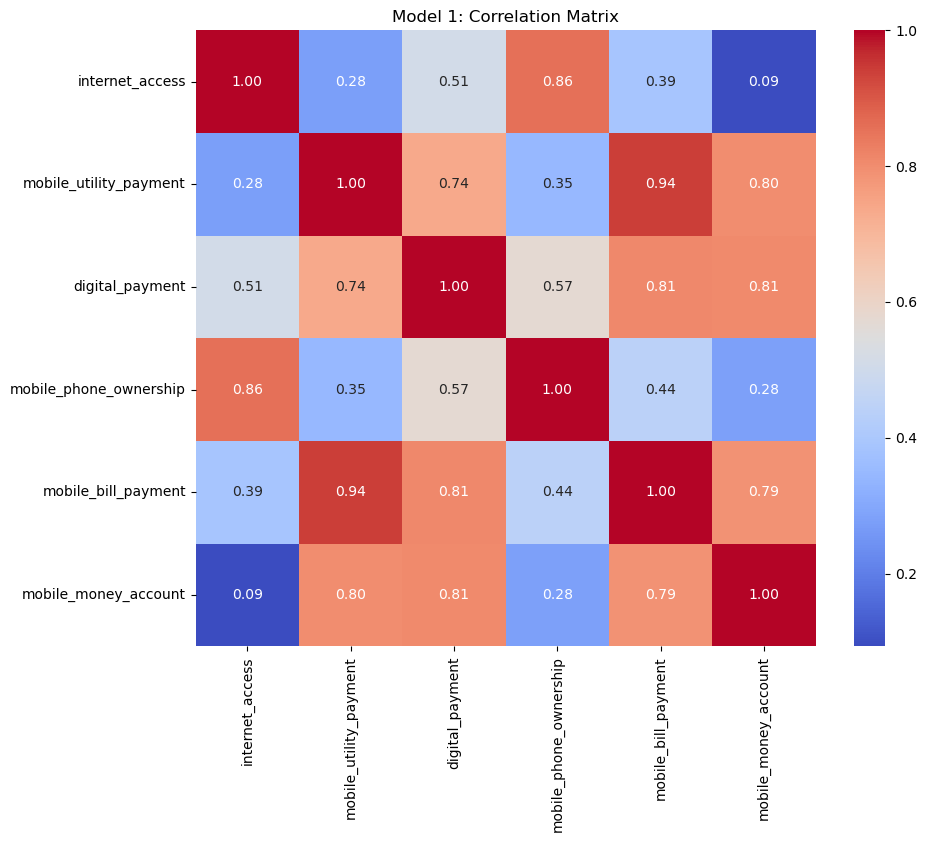

In [23]:
# creating a correlation matrix for model 1
correlation_matrix_model1 = model1.corr()

# Displaying the correlation matrix
print(correlation_matrix_model1)


# Plotting the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_model1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Model 1: Correlation Matrix')
plt.show()

### Correlation Test for Model 2

                        internet_access  mobile_utility_payment  \
internet_access                1.000000                0.275408   
mobile_utility_payment         0.275408                1.000000   
digital_payment                0.507508                0.736970   
mobile_phone_ownership         0.856528                0.346597   
mobile_bill_payment            0.389306                0.940515   
mobile_money_account           0.092876                0.799250   

                        digital_payment  mobile_phone_ownership  \
internet_access                0.507508                0.856528   
mobile_utility_payment         0.736970                0.346597   
digital_payment                1.000000                0.573997   
mobile_phone_ownership         0.573997                1.000000   
mobile_bill_payment            0.809292                0.440903   
mobile_money_account           0.806038                0.279005   

                        mobile_bill_payment  mobile_money_ac

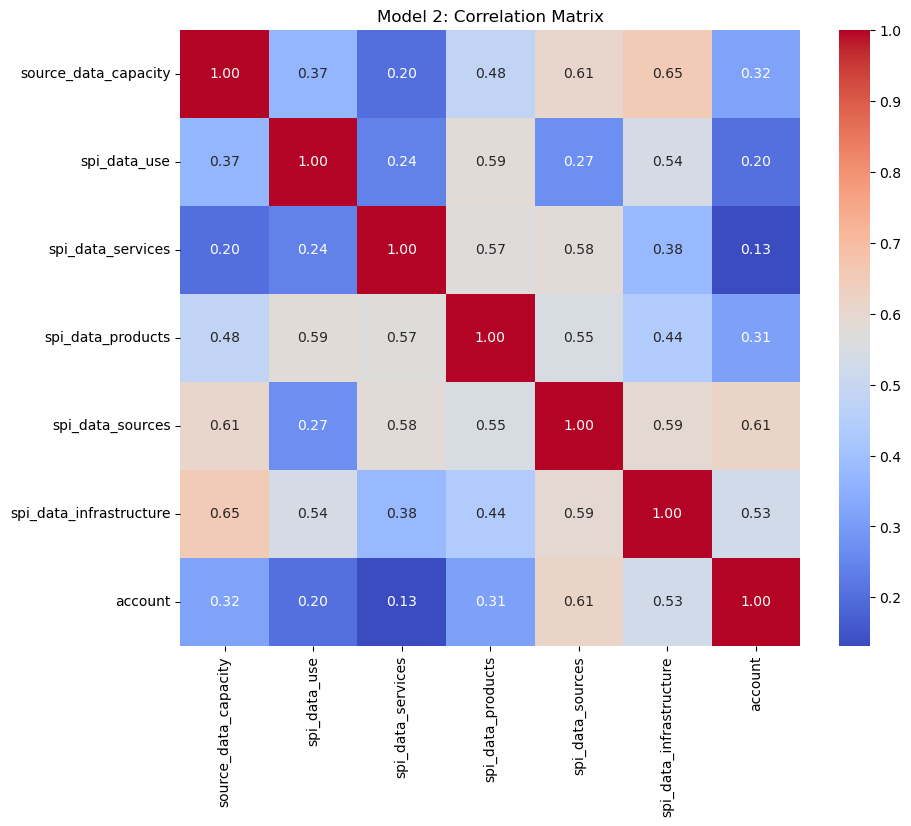

In [24]:
# creating a correlation matrix for model 2
correlation_matrix_model2 = model2.corr()

# Displaying the correlation matrix
print(correlation_matrix_model1)


# Plotting the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_model2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Model 2: Correlation Matrix')
plt.show()

## 5.3. Test for Multicollinearity

### Multicollinearity Test for Model 1

In [25]:
# Creating a DataFrame to store VIF results
vif_data_model1 = pd.DataFrame()
vif_data_model1["Variable"] = indep_var_model1.columns
vif_data_model1["VIF"] = [variance_inflation_factor(indep_var_model1.values, i) for i in range(indep_var_model1.shape[1])]

print("Variance Inflation Factor (VIF) for Model 1:")
print(vif_data_model1)

Variance Inflation Factor (VIF) for Model 1:
                 Variable        VIF
0                   const  40.483693
1         internet_access   3.902965
2  mobile_utility_payment   9.475282
3         digital_payment   3.495942
4  mobile_phone_ownership   4.171238
5     mobile_bill_payment  12.216094


Correlation Matrix for Model 1:
                        internet_access  mobile_utility_payment  \
internet_access                1.000000                0.275408   
mobile_utility_payment         0.275408                1.000000   
digital_payment                0.507508                0.736970   
mobile_phone_ownership         0.856528                0.346597   
mobile_bill_payment            0.389306                0.940515   

                        digital_payment  mobile_phone_ownership  \
internet_access                0.507508                0.856528   
mobile_utility_payment         0.736970                0.346597   
digital_payment                1.000000                0.573997   
mobile_phone_ownership         0.573997                1.000000   
mobile_bill_payment            0.809292                0.440903   

                        mobile_bill_payment  
internet_access                    0.389306  
mobile_utility_payment             0.940515  
digital_payment         

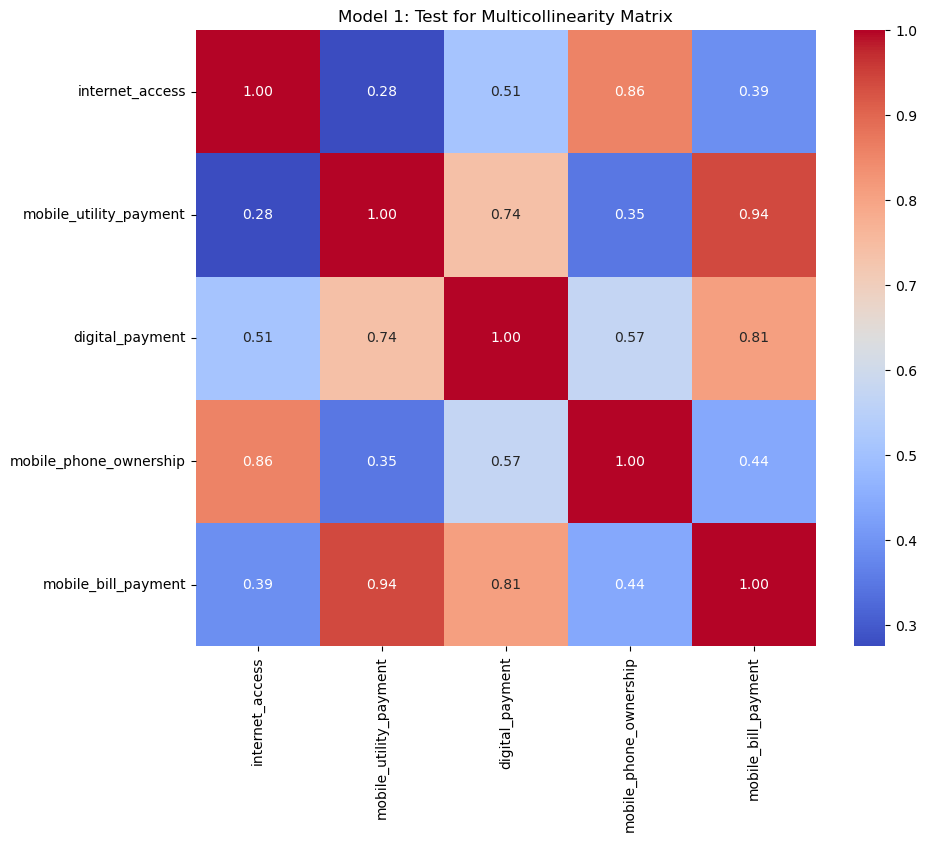

In [26]:
# Calculating correlation matrix for independent variables in Model 1
correlation_matrix_model1 = model1[['internet_access', 'mobile_utility_payment', 
                                    'digital_payment', 'mobile_phone_ownership', 
                                    'mobile_bill_payment']].corr()

# Displaying correlation matrix for Model 1
print("Correlation Matrix for Model 1:")
print(correlation_matrix_model1)

# Plotting correlation matrix for Model 1
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_model1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Model 1: Test for Multicollinearity Matrix')
plt.show()

### Multicollinearity Test for Model 2

In [27]:
# Creating a DataFrame to store VIF results
vif_data_model2 = pd.DataFrame()
vif_data_model2["Variable"] = indep_var_model2.columns
vif_data_model2["VIF"] = [variance_inflation_factor(indep_var_model2.values, i) for i in range(indep_var_model2.shape[1])]

print("Variance Inflation Factor (VIF) for Model 2:")
print(vif_data_model2)

Variance Inflation Factor (VIF) for Model 2:
                  Variable         VIF
0                    const  127.526234
1     source_data_capacity    2.453183
2             spi_data_use    2.039501
3        spi_data_services    2.109660
4        spi_data_products    2.651508
5         spi_data_sources    2.616190
6  spi_data_infrastructure    2.604678


Correlation Matrix for Model 2:
                         source_data_capacity  spi_data_use  \
source_data_capacity                 1.000000      0.368934   
spi_data_use                         0.368934      1.000000   
spi_data_services                    0.199737      0.243448   
spi_data_products                    0.482582      0.585447   
spi_data_sources                     0.605898      0.268184   
spi_data_infrastructure              0.654020      0.539743   

                         spi_data_services  spi_data_products  \
source_data_capacity              0.199737           0.482582   
spi_data_use                      0.243448           0.585447   
spi_data_services                 1.000000           0.569445   
spi_data_products                 0.569445           1.000000   
spi_data_sources                  0.582020           0.546027   
spi_data_infrastructure           0.378305           0.439675   

                         spi_data_sources  spi_data_infrastructure  
s

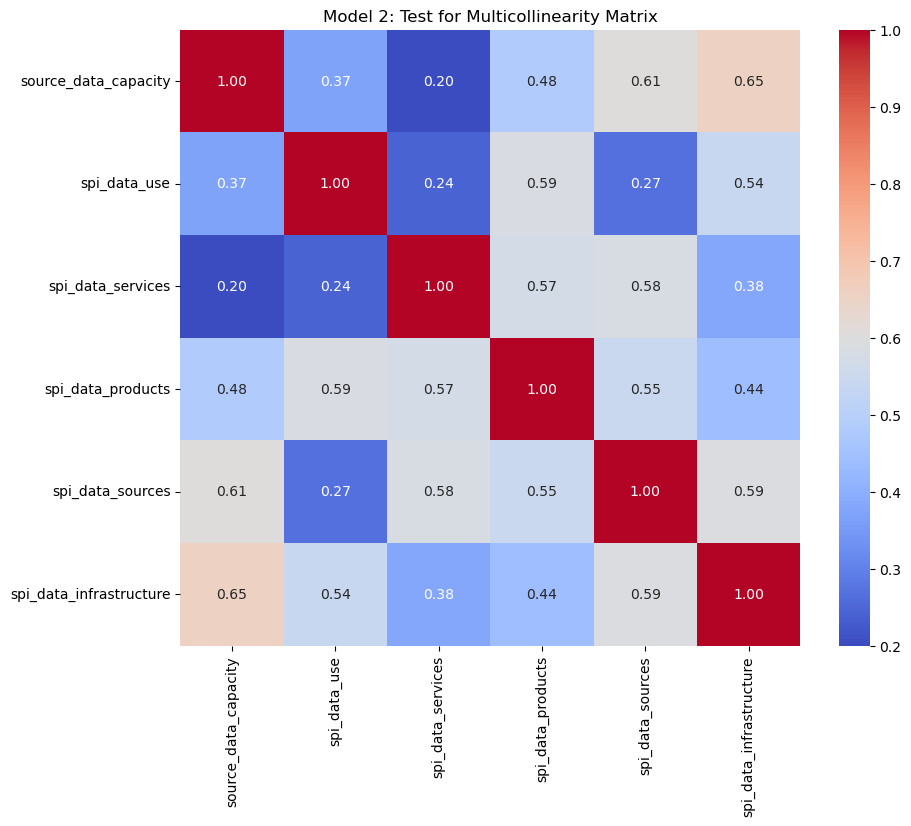

In [28]:
# Calculatting correlation matrix for independent variables in Model 2
correlation_matrix_model2 = model2[['source_data_capacity', 'spi_data_use', 
                                    'spi_data_services', 'spi_data_products', 
                                    'spi_data_sources', 'spi_data_infrastructure']].corr()

# Displaying correlation matrix for Model 2
print("Correlation Matrix for Model 2:")
print(correlation_matrix_model2)

# Plotting correlation matrix for Model 2
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_model2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Model 2: Test for Multicollinearity Matrix')
plt.show()

## 5.4. Descriptive Statistics

### Descriptive Statistics for Model 1

In [29]:
# Calculating descriptive statistics for model 1
desc_model1 = model1.describe()
desc_model1

,internet_access,mobile_utility_payment,digital_payment,mobile_phone_ownership,mobile_bill_payment,mobile_money_account
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,37.359000,9.635500,41.865250,72.711750,13.412500,28.772500
std,19.445526,9.140128,19.434911,15.605675,10.886769,19.105076
min,5.220000,0.000000,4.810000,32.160000,1.450000,0.000000
25%,23.115000,3.142500,26.740000,63.490000,4.937500,9.782500
50%,31.055000,6.225000,42.985000,75.665000,9.855000,31.865000
75%,49.785000,13.865000,54.182500,83.212500,18.960000,42.477500
max,82.910000,36.060000,80.810000,100.000000,44.910000,68.660000


In [49]:
# Selecting only numeric columns for calculating descriptive statistics
numeric_cols_model1 = ['mobile_money_account','internet_access', 'mobile_utility_payment', 
                       'digital_payment', 'mobile_phone_ownership', 
                       'mobile_bill_payment']

desc_model1 = model1[numeric_cols_model1].describe()

# Adding skewness and kurtosis
desc_model1.loc['skewness'] = model1[numeric_cols_model1].skew()
desc_model1.loc['kurtosis'] = model1[numeric_cols_model1].kurt()

# Adding additional metrics
desc_model1.loc['Standard Error'] = model1[numeric_cols_model1].sem()
desc_model1.loc['Mode'] = model1[numeric_cols_model1].mode().iloc[0]  # Get the mode from the first row
desc_model1.loc['Sample Variance'] = model1[numeric_cols_model1].var()
desc_model1.loc['Range'] = model1[numeric_cols_model1].max() - model1[numeric_cols_model1].min()
desc_model1.loc['Sum'] = model1[numeric_cols_model1].sum()

# Displaying the summary
desc_model1

,mobile_money_account,internet_access,mobile_utility_payment,digital_payment,mobile_phone_ownership,mobile_bill_payment
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,28.772500,37.359000,9.635500,41.865250,72.711750,13.412500
std,19.105076,19.445526,9.140128,19.434911,15.605675,10.886769
min,0.000000,5.220000,0.000000,4.810000,32.160000,1.450000
25%,9.782500,23.115000,3.142500,26.740000,63.490000,4.937500
50%,31.865000,31.055000,6.225000,42.985000,75.665000,9.855000
75%,42.477500,49.785000,13.865000,54.182500,83.212500,18.960000
max,68.660000,82.910000,36.060000,80.810000,100.000000,44.910000
skewness,0.092837,0.692206,1.338398,0.238878,-0.677023,1.395810
kurtosis,-1.058531,-0.184415,1.173069,-0.652349,0.111974,1.681350


### Descriptive Statistics for Model 2

In [48]:
# Calculating descriptive statistics for model 2
desc_model2 = model2.describe()

# Displaying the summary
desc_model2

,source_data_capacity,spi_data_use,spi_data_services,spi_data_products,spi_data_sources,spi_data_infrastructure,account
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,55.142857,76.851429,61.064857,78.389429,32.927143,51.857143,48.731429
std,16.868249,13.529605,14.641475,7.736023,13.621253,12.838689,19.553514
min,20.000000,40.000000,20.600000,53.920000,9.040000,25.000000,5.830000
25%,45.000000,70.000000,60.300000,76.540000,25.590000,42.500000,34.560000
50%,60.000000,80.000000,63.870000,78.960000,29.180000,50.000000,49.490000
75%,65.000000,90.000000,67.200000,82.445000,38.620000,60.000000,61.690000
max,80.000000,100.000000,86.670000,89.390000,70.280000,80.000000,90.530000


In [61]:
# Selecting only numeric columns for calculating descriptive statistics
numeric_cols_model2 = ['account','source_data_capacity', 'spi_data_use', 
                'spi_data_services', 'spi_data_products', 
                'spi_data_sources', 'spi_data_infrastructure']

desc_model2 = model2[numeric_cols_model2].describe()

# Adding skewness and kurtosis
desc_model2.loc['skewness'] = model2[numeric_cols_model2].skew()
desc_model2.loc['kurtosis'] = model2[numeric_cols_model2].kurt()

# Adding additional metrics
desc_model2.loc['Standard Error'] = model2[numeric_cols_model2].sem()
desc_model2.loc['Mode'] = model2[numeric_cols_model2].mode().iloc[0]  # Get the mode from the first row
desc_model2.loc['Sample Variance'] = model2[numeric_cols_model2].var()
desc_model2.loc['Range'] = model2[numeric_cols_model2].max() - model2[numeric_cols_model2].min()
desc_model2.loc['Sum'] = model2[numeric_cols_model2].sum()

# Displaying the summary
desc_model2

,account,source_data_capacity,spi_data_use,spi_data_services,spi_data_products,spi_data_sources,spi_data_infrastructure
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,48.731429,55.142857,76.851429,61.064857,78.389429,32.927143,51.857143
std,19.553514,16.868249,13.529605,14.641475,7.736023,13.621253,12.838689
min,5.830000,20.000000,40.000000,20.600000,53.920000,9.040000,25.000000
25%,34.560000,45.000000,70.000000,60.300000,76.540000,25.590000,42.500000
50%,49.490000,60.000000,80.000000,63.870000,78.960000,29.180000,50.000000
75%,61.690000,65.000000,90.000000,67.200000,82.445000,38.620000,60.000000
max,90.530000,80.000000,100.000000,86.670000,89.390000,70.280000,80.000000
skewness,-0.048651,-0.377096,-0.616829,-1.168967,-1.191027,0.971202,0.102107
kurtosis,-0.076453,-0.434600,0.417437,1.996276,1.960332,1.244482,-0.361374


### Plotting Skewness for Model 1 and 2

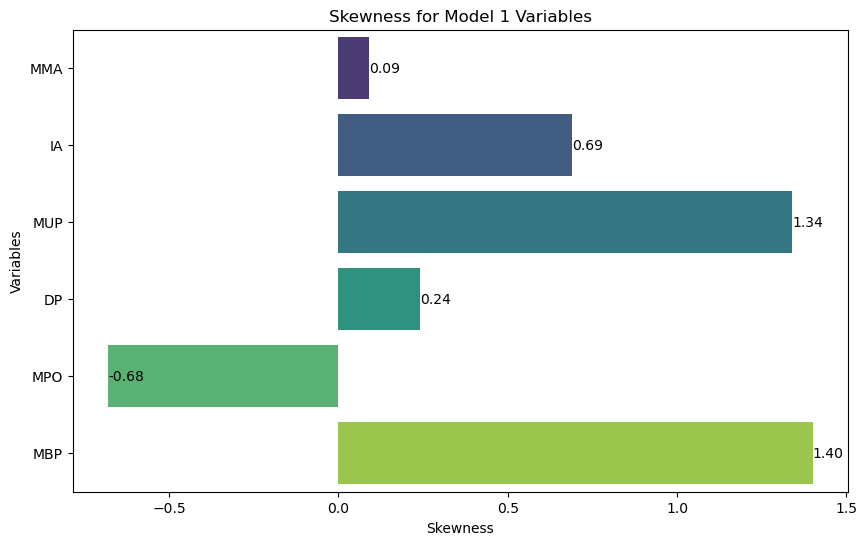

In [97]:
# Skewness data for Model 1
skewness_model1 = [0.09, 0.69, 1.34, 0.24, -0.68, 1.40]

# Variable names for Model 2
variables_model1 = ['MMA', 'IA', 'MUP', 'DP', 'MPO', 'MBP']

# Plotting skewness for Model 2
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=skewness_model1, y=variables_model1, palette="viridis")
plt.title('Skewness for Model 1 Variables')
plt.xlabel('Skewness')
plt.ylabel('Variables')

# Adding data points to the bars
for i in range(len(skewness_model1)):
    ax.text(skewness_model1[i], i, f'{skewness_model1[i]:.2f}', ha='left', va='center', color='black')
    
plt.show()

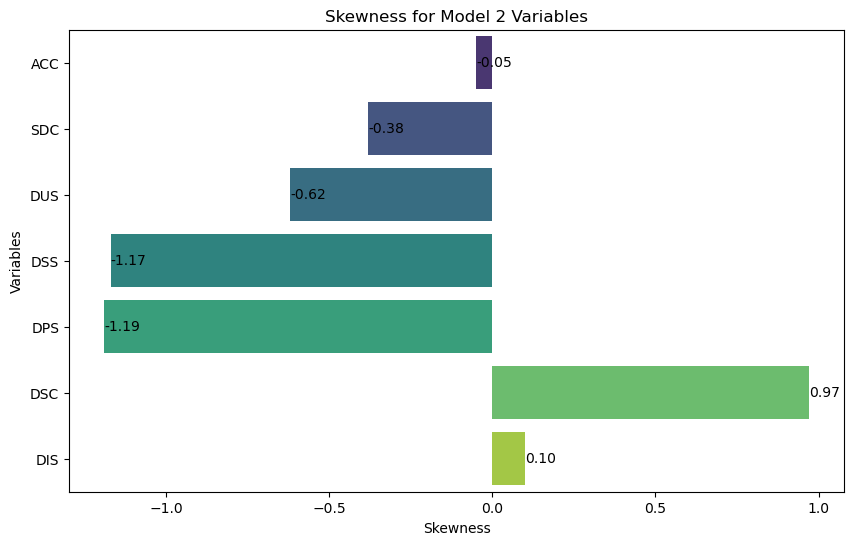

In [98]:
# Skewness data for Model 2
skewness_model2 = [-0.05, -0.38, -0.62, -1.17, -1.19, 0.97, 0.10]

# Variable names for Model 2
variables_model2 = ['ACC', 'SDC', 'DUS', 'DSS', 'DPS', 'DSC', 'DIS']

# Plotting skewness for Model 2
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=skewness_model2, y=variables_model2, palette="viridis")
plt.title('Skewness for Model 2 Variables')
plt.xlabel('Skewness')
plt.ylabel('Variables')

# Adding data points to the bars
for i in range(len(skewness_model2)):
    ax.text(skewness_model2[i], i, f'{skewness_model2[i]:.2f}', ha='left', va='center', color='black')
    
plt.show()

## 5.5. Hypothesis Testing

### Hypothesis Testing for Model 1

In [31]:
# Line of Best fit for Model 1
ols_model1

# Overall Model Significance Test (F-test) for Model 1
f_statistic, f_p_value = ols_model1.fvalue, ols_model1.f_pvalue
print("Model 1 F-statistic:", f_statistic)
print("Model 1 p-value (F-test):", f_p_value)

# Individual Coefficient Significance Test (t-test) for Model 1
t_test_results = ols_model1.t_test(np.eye(len(ols_model1.params)))

print("Individual Coefficient p-values (t-test) for Model 1:")
for idx, variable in enumerate(indep_var_model1.columns):
    print(f"{variable}: {t_test_results.pvalue[idx]}")

Model 1 F-statistic: 41.184773278043544
Model 1 p-value (F-test): 1.7719819035065024e-13
Individual Coefficient p-values (t-test) for Model 1:
const: 0.3459100134441736
internet_access: 9.831638939501509e-05
mobile_utility_payment: 0.09440462482524704
digital_payment: 3.032239454019748e-06
mobile_phone_ownership: 0.07693681973223013
mobile_bill_payment: 0.8790651297196372


### Hypothesis Testing for Model 2

In [32]:
# Line of best fit for Model 2
ols_model2

# Overall Model Significance Test (F-test) for Model 2
f_statistic, f_p_value = ols_model2.fvalue, ols_model2.f_pvalue
print("Model 2 F-statistic:", f_statistic)
print("Model 2 p-value (F-test):", f_p_value)

# Individual Coefficient Significance Test (t-test) for Model 2
t_test_results = ols_model2.t_test(np.eye(len(ols_model2.params)))
print("Individual Coefficient p-values (t-test) for Model 2:")
for idx, variable in enumerate(indep_var_model2.columns):
    print(f"{variable}: {t_test_results.pvalue[idx]}")

Model 2 F-statistic: 7.352573148811251
Model 2 p-value (F-test): 8.644605466870827e-05
Individual Coefficient p-values (t-test) for Model 2:
const: 0.7898080501069904
source_data_capacity: 0.011083716383894056
spi_data_use: 0.38538856115979137
spi_data_services: 0.0023663090448723797
spi_data_products: 0.15678092693555912
spi_data_sources: 0.0001999381497366182
spi_data_infrastructure: 0.0075410358992607385


# 6. Phase 5: Share

In [33]:
# Exporting regression result as an Excel File
# Convert the regression results summary to a dataframe
regression_results_model1 = ols_model1.summary()
regression_results_df_model1 = pd.read_html(regression_results_model1.tables[1].as_html(), header=0, index_col=0)[0]

# Export the dataframe to an Excel file
regression_results_df_model1.to_excel("regression_results_model1.xlsx")

print("Regression results for Model 1.xlsx")

Regression results for Model 1.xlsx


In [58]:
# Exporting descriptive stats result as an excel file for Model 1
desc_model1.to_excel('desc_model1.xlsx')

print('Descriptive statistics for Model 1.xlsx')

Descriptive statistics for Model 1.xlsx


In [59]:
# Exporting descriptive stats result as an excel file for Model 2
desc_model2.to_excel('desc_model2.xlsx')

print('Descriptive statistics for Model 2.xlsx')

Descriptive statistics for Model 2.xlsx


In [103]:
predicted_values_model2

array([36.25275297, 67.71857471, 52.46712807, 47.98902335, 18.8266856 ,
       28.58058205, 44.9136686 , 53.01701255, 67.08734359, 50.64486208,
       56.00199781, 44.26275099, 62.90811648, 39.46190352, 59.06135446,
       61.11429563, 45.06825223, 38.74550916, 53.30689915, 36.97488527,
       33.13351753, 70.41003994, 44.86373269, 43.75912241, 46.66711801,
       40.7967662 , 62.99003982, 34.50329914, 99.3950081 , 19.99720639,
       41.06566196, 50.30056932, 51.74385254, 41.88368771, 59.68677996])

# 7. Phase 6: Conclusion (Act)